# Exploration

This notebook explores the data in the traffic dataset provided by ETHZ.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import contextily as cx

In [2]:
# Load the data
detectors = pd.read_csv('dataset/detectors.csv')
links     = pd.read_csv('dataset/links.csv')
traffic   = pd.read_csv('dataset/smalltraffic.csv')

In [3]:
# Display the cities available
cities = links['citycode'].unique()
print('Cities available: ', cities)

Cities available:  ['augsburg' 'basel' 'bern' 'birmingham' 'bolton' 'bordeaux' 'bremen'
 'cagliari' 'constance' 'darmstadt' 'essen' 'frankfurt' 'graz' 'groningen'
 'hamburg' 'innsbruck' 'kassel' 'london' 'losangeles' 'luzern' 'madrid'
 'melbourne' 'manchester' 'marseille' 'munich' 'paris' 'rotterdam'
 'santander' 'speyer' 'strasbourg' 'stuttgart' 'taipeh' 'tokyo' 'torino'
 'toronto' 'toulouse' 'utrecht' 'vilnius' 'wolfsburg' 'zurich']


In [12]:
road_types = detectors['fclass'].unique()
road_lanes = int(detectors['lanes'].min()), int(detectors['lanes'].max())

# Display the road types available
print('Road types available: ', road_types)
print('Road widths range from {} to {} lanes'.format(*road_lanes))

Road types available:  ['secondary' 'tertiary' 'residential' 'primary' 'other' 'living_street'
 'primary_link' 'secondary_link' 'trunk_link' 'motorway' 'motorway_link'
 'trunk' 'service' 'tertiary_link']
Road widths range from 1 to 9 lanes


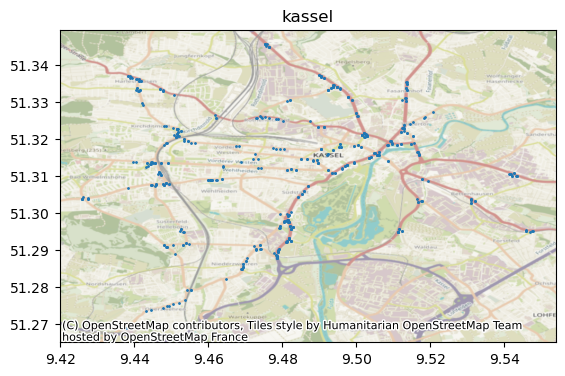

In [13]:
# Map detectors onto a map
city = 'kassel'

city_detectors = detectors[detectors['citycode'] == city]
plt.scatter(city_detectors['long'], city_detectors['lat'], s=1)
cx.add_basemap(plt.gca(), crs='EPSG:4326')
plt.title(city)
plt.show()

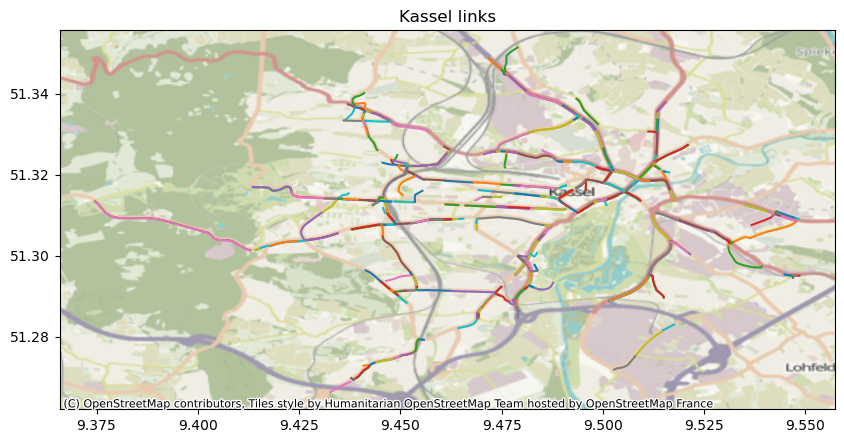

In [14]:
city_links = links[links['citycode'] == city]

plt.figure(figsize=(10, 10))
for linkid in city_links['linkid'].unique():
    link = city_links[city_links['linkid'] == linkid]
    plt.plot(link['long'], link['lat'])
cx.add_basemap(plt.gca(), crs='EPSG:4326')
plt.title(city.capitalize() + ' links')
plt.show()